# Исследование объявлений о продаже квартир

**Входные данные:**      
В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных:   
    1. Вписаны пользователем    
    2. Получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**
-  Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости

**Исследование пройдет в пять шагов:**  
  
**1 шаг.** [Открыть файл с данными и изучить общую информацию.](#one)  
    1.1 [Загрузить данные из файла в датафрейм.](#one1)   
    1.2 [Изучить общую информацию о полученном датафрейме](#one2)    
    1.3 [Общая гистограмма для всех числовых столбцов таблицы](#one3)    
  
**2 шаг.** [Предобработка данных](#two)    
    2.1 [Пропущенные значения в столбцах](#two1)  
    2.2 [Типы данных в каждом столбце](#two2)  
    2.3 [Устранение неявных дубликатов в столбце с названиями](#two3)   
    2.4 [Устранение аномальных значений в столбцах](#two4)  
  
**3 шаг.** [Добавление в таблицу новых столбцов](#three)      
    3.1 [Цена одного квадратного метра](#three1)      
    3.2 [День недели публикации объявления](#three2)       
    3.3 [Месяц публикации объявления](#three3)        
    3.4 [Год публикации объявления](#three4)        
    3.5 [Тип этажа квартиры](#three5)        
    3.6 [Расстояние до центра города в километрах](#three6)        
      
**4 шаг.** [Исследовательский анализ данных](#four)        
    4.1 [Изучение параметров объекта](#four1)        
    4.2 [Изучим, как быстро продавались квартиры](#four2)          
    4.3 [Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта.](#four3)          
    4.4 [Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений](#four4)          
    4.5 [Определим как стоимость объектов зависит от расстояния до центра города.](#four5)          
      
**5 шаг.** [Общий вывод](#five)          

# <a id="one"></a> **1 шаг.** Открыть файл с данными и изучить общую информацию.  

## <a id="one1"></a> 1.1 Загрузить данные из файла в датафрейм.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
data = pd.read_csv('real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

## <a id="one2"></a>1.2 Изучить общую информацию о полученном датафрейме

In [2]:

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Таблица состоит из столбцов:   
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
- `balcony` — число балконов  
- `ceiling_height` — высота потолков (м)  
- `cityCenters_nearest` — расстояние до центра города (м)  
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
- `first_day_exposition` — дата публикации  
- `floor` — этаж   
- `floors_total` — всего этажей в доме  
- `is_apartment` — апартаменты (булев тип)  
- `kitchen_area` — площадь кухни в квадратных метрах (м²)  
- `last_price` — цена на момент снятия с публикации  
- `living_area` — жилая площадь в квадратных метрах (м²)  
- `locality_name` — название населённого пункта  
- `open_plan` — свободная планировка (булев тип)  
- `parks_around3000` — число парков в радиусе 3 км  
- `parks_nearest` — расстояние до ближайшего парка (м)  
- `ponds_around3000` — число водоёмов в радиусе 3 км  
- `ponds_nearest` — расстояние до ближайшего водоёма (м)  
- `rooms` — число комнат  
- `studio` — квартира-студия (булев тип)  
- `total_area` — общая площадь квартиры в квадратных метрах (м²)  
- `total_images` — число фотографий квартиры в объявлении  

Проанализировав все названия столбцов, для будующего удобства было решено переименовать cityCenters_nearest в city_сenters_nearest

In [3]:
data.rename(columns={'cityCenters_nearest':'city_сenters_nearest'}, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Столбцы, в которых есть пропуски:  
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
- `balcony` — число балконов  
- `ceiling_height` — высота потолков (м)  
- `city_сenters_nearest` — расстояние до центра города (м)  
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)   
- `floors_total` — всего этажей в доме  
- `is_apartment` — апартаменты (булев тип)  
- `kitchen_area` — площадь кухни в квадратных метрах (м²)  
- `living_area` — жилая площадь в квадратных метрах (м²)  
- `locality_name` — название населённого пункта  
- `parks_around3000` — число парков в радиусе 3 км  
- `parks_nearest` — расстояние до ближайшего парка (м)  
- `ponds_around3000` — число водоёмов в радиусе 3 км  
- `ponds_nearest` — расстояние до ближайшего водоёма (м)   

Столбцы, в которых нужно изменить тип данных:  
- `first_day_exposition` — дата публикации из типа objekt в тип даты.  
- `is_apartment` — из типа objekt в булев тип   
- `balcony` -  дробное число поменяем на целое 


## 1.3 <a id="one3"></a>Общая гистограмма для всех числовых столбцов таблицы 

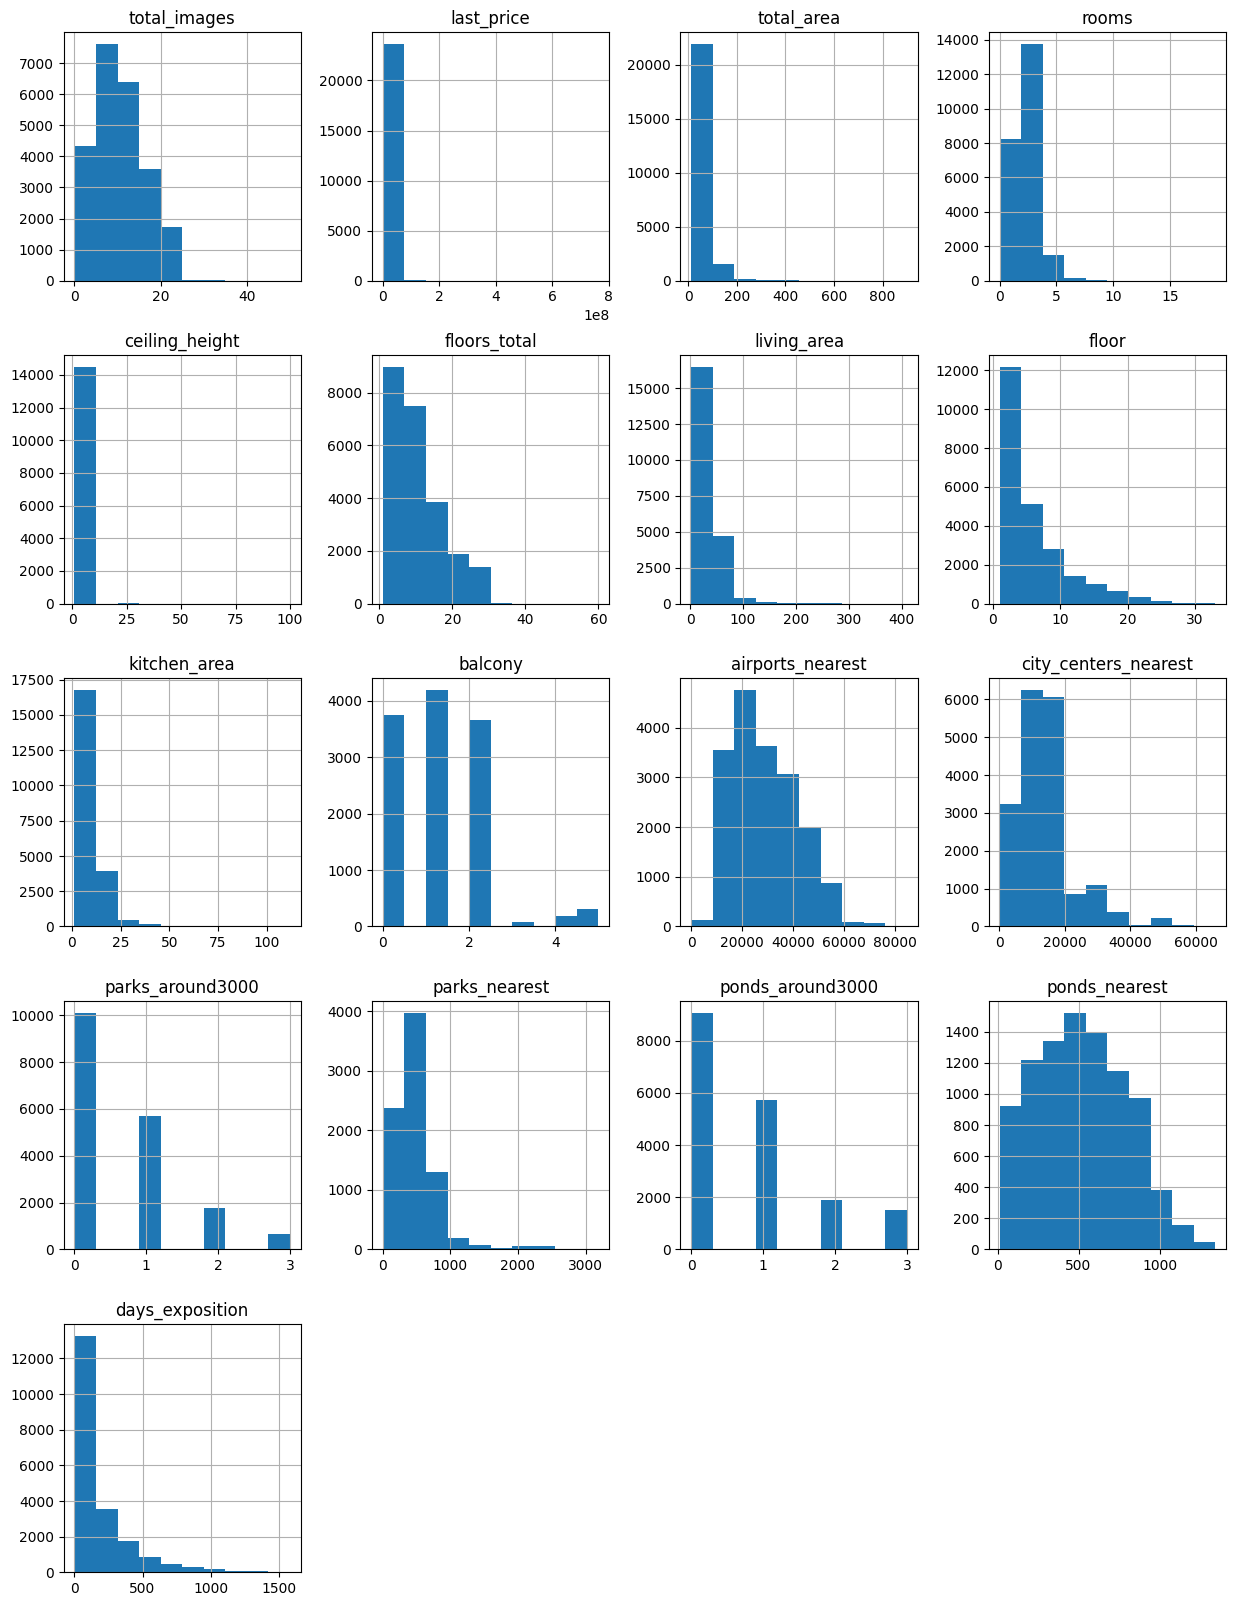

In [5]:
data.hist(figsize=(15,20));

Краткий анализ гистограмм:  
- `total_images`. Большая часть до 25 единиц. Не больше 40 единиц. Аномалий не наблюдается.  
- `last_price`. Есть квартиры до 200 млн.руб. Аномалий не наблюдается. В будущем мы проверим как влияет расстояние от центра на стоимость квартиры.    
- `total_area`. Большая часть недвижимости до 50 м2.Есть недвижимость более 400 м2. В будущем проверим подробнее на анамальные значения.    
- `rooms`. В основном 3 комнаты. есть недвижисть с 10 комнатами.   
- `ceiling_height`. Есть высота полока более 25м. Это явное анамальное значение  
- `floors_total`.От 1 до 40 этажей. Аномалий не наблюдается.  
- `living_area`.Есть недвижимость более 300 м2. В будущем проверим подробнее на анамальные значени  
- `floor`. Аномалий не наблюдается. В будущем проверим нет ли ошибки в некторых позициях: когда этажность здания меньше, чем этаж недвижимости.  
- `kitchen_area`. В основном все кухни площадью до 13 м2. Есть кухни и более 50 м2.В будущем проверим подробнее на анамальные значения.   
- `balcony`. 0,1,2,3,4 балконов.  
- `airports_nearest`. До 80 км. Аномалий не наблюдается  
- `city_сenters_nearest`. До 60 км. Аномалий не наблюдается  
- `parks_nearest` До 3 км. Аномалий не наблюдается  
- `parks_around3000`. От 0 до 3 парков.Аномалий не наблюдается  
- `ponds_nearest`.До 1,5 км. Аномалий не наблюдается  
- `ponds_around3000` От 0 до 3 прудов.Аномалий не наблюдается  
- `days_exposition`. Некторые обьявления висят более 4 лет. Нужно ознакомиться поближе со сроками размещения обьявления.  



**Вывод шаг 1 Открыть файл с данными и изучить общую информацию**

1. Таблица состоит из столбцов:
    - `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
    - `balcony` — число балконов
    - `ceiling_height` — высота потолков (м)
    - `cityCenters_nearest` — расстояние до центра города (м)
    - `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
    - `first_day_exposition` — дата публикации
    - `floor` — этаж
    - `floors_total` — всего этажей в доме
    - `is_apartment` — апартаменты (булев тип)
    - `kitchen_area` — площадь кухни в квадратных метрах (м²)
    - `last_price` — цена на момент снятия с публикации
    - `living_area` — жилая площадь в квадратных метрах (м²)
    - `locality_name` — название населённого пункта
    - `open_plan` — свободная планировка (булев тип)
    - `parks_around3000` — число парков в радиусе 3 км
    - `parks_nearest` — расстояние до ближайшего парка (м)
    - `ponds_around3000` — число водоёмов в радиусе 3 км
    - `ponds_nearest` — расстояние до ближайшего водоёма (м)
    - `rooms` — число комнат
    - `studio` — квартира-студия (булев тип)
    - `total_area` — общая площадь квартиры в квадратных метрах (м²)
    - `total_images` — число фотографий квартиры в объявлении               

2. Проанализировав все названия столбцов, для будующего удобства было решено переименовать cityCenters_nearest в city_сenters_nearest  

3. Всего 23 699 недвижимости в датасете.

4. Столбцы с пропусками:  
    - `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
    - `balcony` — число балконов  
    - `ceiling_height` — высота потолков (м)  
    - `city_сenters_nearest` — расстояние до центра города (м)  
    - `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)   
    - `floors_total` — всего этажей в доме  
    - `is_apartment` — апартаменты (булев тип)  
    - `kitchen_area` — площадь кухни в квадратных метрах (м²)  
    - `living_area` — жилая площадь в квадратных метрах (м²)  
    - `locality_name` — название населённого пункта  
    - `parks_around3000` — число парков в радиусе 3 км  
    - `parks_nearest` — расстояние до ближайшего парка (м)  
    - `ponds_around3000` — число водоёмов в радиусе 3 км  
    - `ponds_nearest` — расстояние до ближайшего водоёма (м)   

5. Столбцы , в которых нужно изменить тип данных:  
    - `first_day_exposition` — дата публикации из типа objekt в тип даты.  
    - `is_apartment` — из типа objekt в булев тип   
    - `balcony` -  дробное число поменяем на целое    

6. Проверить на анамальные значения столбцы:  
    - `total_area`. Есть недвижимость более 400 м2
    - `rooms`. Есть недвижимость более с 10 комнатами.   
    - `ceiling_height`. Есть высота полока более 25м.  
    - `living_area`.Есть недвижимость более 300 м2.
    - `kitchen_area`.Есть кухни и более 50 м2
    - `days_exposition`. Некторые обьявления висят более 4 лет.

# **2 шаг.** <a id="two"></a>Предобработка данных  

## 2.1 <a id="two1"></a> Пропущенные значения в столбцах

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

`locality_name` — название населённого пункта-49 пропусков.  Местоположение подобрать мы не можем, но так же местоположение является одной из важных критериев недвижимости. Поэтому удалим строки без местоположения. Это 0,2% от общих данных.

In [7]:
data = data.dropna(subset=['locality_name'])
print('Количество пропущенных значений',data['locality_name'].isna().sum())

Количество пропущенных значений 0


   `ceiling_height` — высота потолков (м)-9159 пропусков  
   `floors_total` — всего этажей в доме - 86 пропусков  
   Заполним пропуски медианным значением по населенному пункту.

In [8]:
data.loc[data['ceiling_height'].isnull(), 'ceiling_height'] = data.groupby('locality_name')['ceiling_height'].transform('median')    
print('Количество пропущенных значений',data['ceiling_height'].isna().sum())

Количество пропущенных значений 121


121 пропуск не заполнен. Пропуск в высоте потолков не может быть заполнен медианным значением по названию населенного пункта, если это единственное обьявление из данного местоположения. Заменим минимальным значением - 2,5м

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.5)
print('Количество пропущенных значений',data['ceiling_height'].isna().sum())

Количество пропущенных значений 0


In [10]:
data.loc[data['floors_total'].isnull(), 'floors_total'] = data.groupby('locality_name')['floors_total'].transform('median')
print('Количество пропущенных значений',data['floors_total'].isna().sum())


Количество пропущенных значений 0


`living_area` — жилая площадь в квадратных метрах (м²) - 1903 пропусков  
Заполним пропуски медианным значением по количеству комнат

In [11]:
data.loc[data['living_area'].isnull(), 'living_area'] = data.groupby('rooms')['living_area'].transform('median')   
print('Количество пропущенных значений',data['living_area'].isna().sum())


Количество пропущенных значений 0


`kitchen_area` — площадь кухни в квадратных метрах (м²)-2278 пропусков.Заполним медианным значениями по пропускам относительно количества комнат.

In [12]:
data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = data.groupby('rooms')['kitchen_area'].transform('median') 
print('Количество пропущенных значений',data['kitchen_area'].isna().sum())

Количество пропущенных значений 197


После замены медианным значением осталось 197 пропусков. Так как мы заменяли по количеству комнат, то в этих 197 недвижимости количество комнат 0. Проверим данную информацию

In [13]:
print('Количество недвижимости с количеством комнат 0:')
data[data['rooms']==0][['rooms']].count()
#Проверка прошла успешно. Теперь проверим являются ли данная недвижимость студией или открытой комнатой.

Количество недвижимости с количеством комнат 0:


rooms    197
dtype: int64

In [14]:
print('Количество недвижимости с количеством комнат 0 и являющимися или студией или открытым планом:')
data[(((data['studio']==True) | (data['open_plan']==True))& (data['rooms']==0))][['studio','open_plan']].count()

Количество недвижимости с количеством комнат 0 и являющимися или студией или открытым планом:


studio       197
open_plan    197
dtype: int64

В студиях и в недвижимастях с открытой планировкой нет комнат. Значит и нет отдельного помещения для кухни. Заменим пропуски значением 0.

In [15]:
data['kitchen_area']=data['kitchen_area'].fillna(0)
print('Количество пропущенных значений',data['kitchen_area'].isna().sum())


Количество пропущенных значений 0


`balcony` — число балконов. Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0

In [16]:
data['balcony'] = data['balcony'].fillna(0)
print('Количество пропущенных значений',data['balcony'].isna().sum())

Количество пропущенных значений 0


`is_apartment` — апартаменты (булев тип) -20924 пропусков  
`open_plan` — свободная планировка (булев тип) пропусков нет  
`studio` — квартира-студия (булев тип) пропусков нет

3 столбца отображают характеристику недвижимости. Посмотрим взаимосвязь этих 3-столбцов. 

Так же на сайте https://journal.tinkoff.ru/opasnosti-apartamentov/ есть информация , что 
>Для государства апартаменты — вид коммерческой недвижимости.


In [17]:
apartment = data['is_apartment']
print('Столбец `is_apartment` состоит из следующих значений: ')
apartment.value_counts()


Столбец `is_apartment` состоит из следующих значений: 


is_apartment
False    2710
True       50
Name: count, dtype: int64

In [18]:
studio = data['studio']
print('Столбец `studio` состоит из следующих значений: ')
studio.value_counts()

Столбец `studio` состоит из следующих значений: 


studio
False    23501
True       149
Name: count, dtype: int64

In [19]:
open_plan = data['open_plan']
print('Столбец `open_plan` состоит из следующих значений: ')
open_plan.value_counts()

Столбец `open_plan` состоит из следующих значений: 


open_plan
False    23583
True        67
Name: count, dtype: int64

In [20]:
first= data[(data['is_apartment']==True) & (data['studio']==True)][['is_apartment']].count()
second = data[(data['is_apartment']==True) & (data['open_plan']==True)][['is_apartment']].count()

print(f'Количество недвижимости, которые одновременно являются апартаментами и студией: {first[0]} ')
print(f'Количество недвижимости, которые одновременно являются апартаментами и открытым пространством: {second[0]}  ')


Количество недвижимости, которые одновременно являются апартаментами и студией: 0 
Количество недвижимости, которые одновременно являются апартаментами и открытым пространством: 0  


Из анализа понятно, что если недвижимость является открытым пространством или студией, то она не может быть апартаментом. Но только 1% недвижимости отметили, что это студия или открытое пространство. А пропусков в столбце апартаменты 90%.  

 Исходя из данных интернета,мы можем сделать вывод, что апартаменты это коммерческая недвижимость. Предположим, что большая часть недвижимости этого иследования являются жилым пространством.   

 Так же зависимость от того, является ли недвижимость апартаментами или нет не входит в цели данного исследования.   

 Примем, что квартиры с пропусками не явлются апартаментами и заменим значением False. Также правильно будет сообщить о пропусках данных заказчику.

In [21]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print('Количество пропущенных значений',data['is_apartment'].isna().sum())

Количество пропущенных значений 0


`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м) -5542 пропусков   
`city_сenters_nearest` — расстояние до центра города (м)- 5519 пропусков    
`parks_around3000` — число парков в радиусе 3 км - 5518 пропусков   
`parks_nearest` — расстояние до ближайшего парка (м)  - 15620 пропусков  
`ponds_nearest` — расстояние до ближайшего водоёма (м) - 14589пропусков  


Данные пропуски могут говорить о том, что парк(водоем, аэропорт) находится очень далеко и расстояние не учитывается в приложении.Или клиент не заполнил данную информацию.Логичную замену предложить невозможно, оставим эти значения пустыми.  

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)-3138 пропусков

 Если стоят пропуски, то скорее всего это обозначает, что обьявление еще не снято с публикации, или сделка была совершена, но не была закрыта на онлайн-ресурсе.  


## 2.2 <a id="two2"></a>Типы данных в каждом столбце    

Столбцы , в которых нужно изменить тип данных:  
- `first_day_exposition` — дата публикации из типа objekt в тип даты.  
- `is_apartment` — из типа objekt в булев тип   
- `balcony` -  дробное число поменяем на целое   

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [23]:
data['is_apartment'] = data['is_apartment'].astype(bool)

In [24]:
data['balcony'] = data['balcony'].astype(int)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony              

## 2.3 <a id="two3"></a>Устранение неявных дубликатов в столбце с названиями.

In [26]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [27]:
print('Количество уникальных значений в столце с названием населенных пунктов',len(data['locality_name'].unique()))

Количество уникальных значений в столце с названием населенных пунктов 364


In [28]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа', 'посёлок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('коттеджный посёлок', 'посёлок', regex=True)

In [29]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Ефимовский', 'посёлок Плодовое', 'деревня Заклинье',
       'посёлок Торковичи', 'посёлок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [30]:
print('Количество уникальных значений в столце с названием населенных пунктов',len(data['locality_name'].unique()))

Количество уникальных значений в столце с названием населенных пунктов 321


## 2.4 <a id="two4"></a>Устранение аномальных значений в столбцах 


- `ceiling_height`. По гистрограмме мы увидели, что есть высота потолка более 25м.

In [31]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.732752
std          1.010507
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

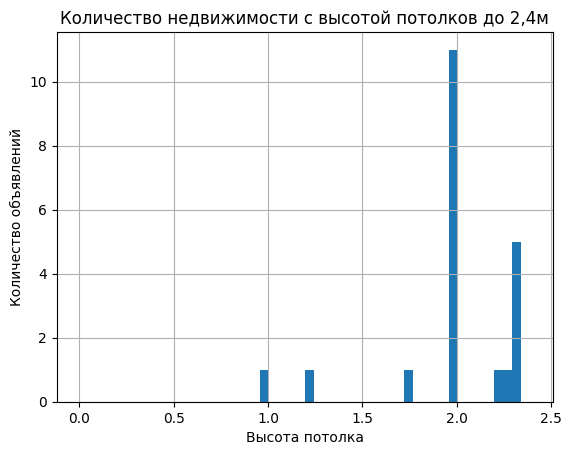

In [32]:
data['ceiling_height'].hist(bins=50, range=(0,2.39))  # по нормам минимальная высота считается 2,4м

plt.title('Количество недвижимости с высотой потолков до 2,4м')
plt.xlabel("Высота потолка")
plt.ylabel("Количество объявлений")
plt.show()

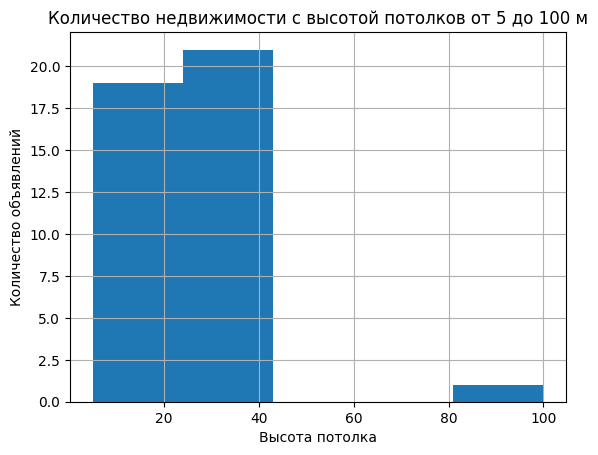

In [33]:
data['ceiling_height'].hist(bins=5, range=(5,100)) 
plt.title('Количество недвижимости с высотой потолков от 5 до 100 м')
plt.xlabel("Высота потолка")
plt.ylabel("Количество объявлений")
plt.show()

Уберем аномальные значения с условием что потолок находится в промежутке от 2,4 до 5 м

In [34]:
old_data_cel=data['ceiling_height']

In [35]:
data = data.query('2.4 <= ceiling_height<= 5')

In [36]:
new_data_cel=data['ceiling_height']

In [37]:
proz= 1-(new_data_cel.shape[0] / old_data_cel.shape[0])
print(f'Процент удаленных данных {proz:.2%}')


Процент удаленных данных 0.26%


- `floors_total` проверим нет ли аномальных значений. Затем нужно сделать проверку, не превышает ли этаж квартиры общую этажность.

In [38]:
data['floors_total'].unique()

array([16. , 11. ,  5. , 14. , 12. , 26. , 24. , 27. ,  9. ,  6. , 17. ,
       25. ,  3. , 23. , 19. , 18. ,  4. , 22. ,  8. ,  2. , 10. ,  7. ,
       13. , 15. , 20. , 28. , 36. , 21. , 35. , 34. , 60. ,  1. , 29. ,
       14.5, 33. , 52. ])

Лахта-центр один из высоток Санкт-Петербурга. Количество этажей-87. В данной таблице макимальное количество этажей 60, это меньше, чем самая большая высотка СПб. По уникальным значениям не наблюдается аномалий.

In [39]:
prov2=data[(data['floors_total']< data['floor'])].shape[0]
print(f'Количество недвижимости, у которых этаж превышает этажность здания: {prov2} ')


Количество недвижимости, у которых этаж превышает этажность здания: 32 


In [40]:
data[(data['floors_total']< data['floor'])].head(5)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
457,4,9788348.0,70.8,2015-08-01,2,2.7,9.0,38.4,12,False,False,False,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
2392,7,5395770.0,53.0,2017-06-29,2,2.7,9.0,29.0,22,False,False,False,9.00,0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.8,2016-09-21,1,2.7,9.0,19.4,15,False,False,False,9.01,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
4617,4,4275062.0,61.2,2017-04-27,2,2.7,9.0,32.0,12,False,False,False,12.20,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,72.0
4848,15,13000000.0,98.0,2017-02-08,3,2.7,9.0,45.0,18,False,False,False,9.50,0,Санкт-Петербург,37625.0,14153.0,0.0,NaN,0.0,NaN,29.0


Количество недвижимости, у которых этаж превышает этажность здания состовляет 0,1% от общих данных. Оставляем как есть, только проверим у столбца 'floor' максимальное значение.

In [41]:
data['floor'].describe()

count    23589.000000
mean         5.895545
std          4.884561
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

- `living_area`. По гистограмме мы видели, что есть недвижимость более 300 м2.

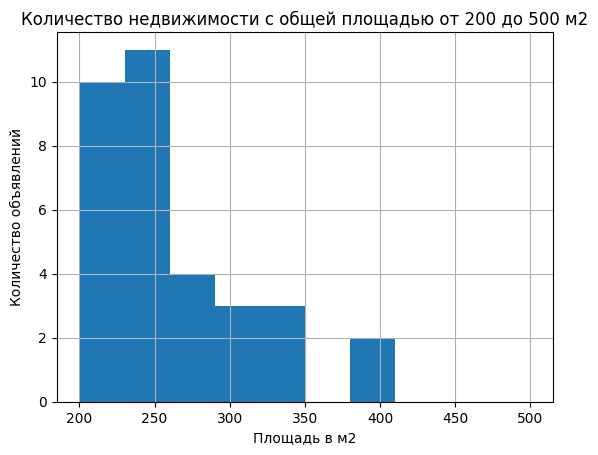

In [42]:
data['living_area'].hist( range=(200,500))

plt.title('Количество недвижимости с общей площадью от 200 до 500 м2')
plt.xlabel("Площадь в м2")
plt.ylabel("Количество объявлений")
plt.show()

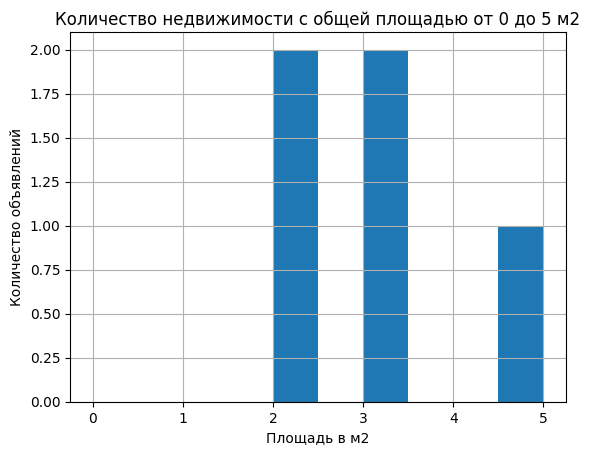

In [43]:
data['living_area'].hist( range=(0,5))

plt.title('Количество недвижимости с общей площадью от 0 до 5 м2')
plt.xlabel("Площадь в м2")
plt.ylabel("Количество объявлений")
plt.show()

Удалим значения выше 200 м2 и меньше 5 м2, так как данных значений не много, и они на фоне остальных данных выглядят аномальными. В конце проведем проверку: сколько процентов данных было удалено.

In [44]:
old_data_liv=data['living_area']

In [45]:
data = data.query('living_area<= 200')

In [46]:
data = data.query('living_area> 5')

In [47]:
new_data_liv=data['living_area']

In [48]:
proz2= 1-(new_data_liv.shape[0] / old_data_liv.shape[0])
print(f'Процент удаленных данных {proz2:.2%}')


Процент удаленных данных 0.15%


- `total_images` — число фотографий квартиры в объявлении  

In [49]:
data['total_images'].unique() #оставляем данные значения.Максимальное значение 50.Оно может оказаться правдой.

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37], dtype=int64)

- `last_price` — цена на момент снятия с публикации

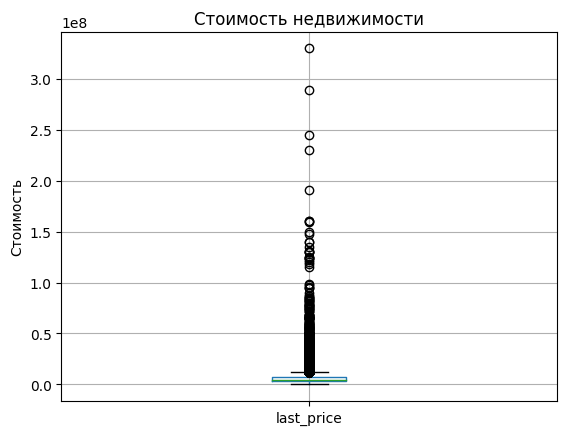

In [50]:
data.boxplot('last_price')

plt.title('Стоимость недвижимости')
plt.ylabel("Стоимость")
plt.show()

In [51]:
data['last_price'].unique()

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

In [52]:
data = data[(data['last_price'] > data['last_price'].quantile(0.005)) & (data['last_price'] < data['last_price'].quantile(0.995))]

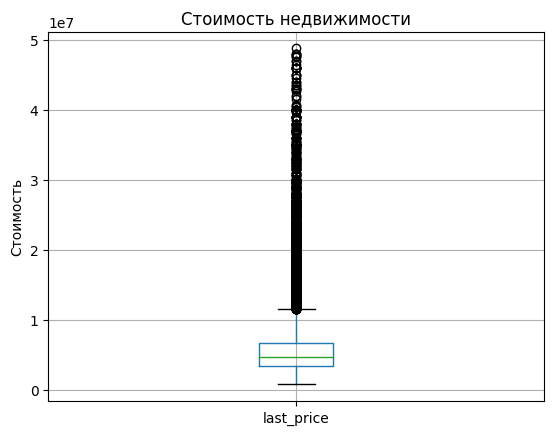

In [53]:
data.boxplot('last_price')

plt.title('Стоимость недвижимости')
plt.ylabel("Стоимость")
plt.show()

Ящик с усами нам показал что есть выбросы как недвижимость стоимостью более 300млн.руб. С помощью квантилей мы убрали 0,05% от общих данных с максимальным значением. И 0,05% от общих данных с минимальным значением. После видно более равномерное распределение стоимости.

- `rooms`. По гистограмме мы видели, что есть недвижимость более с 10 комнатами.   

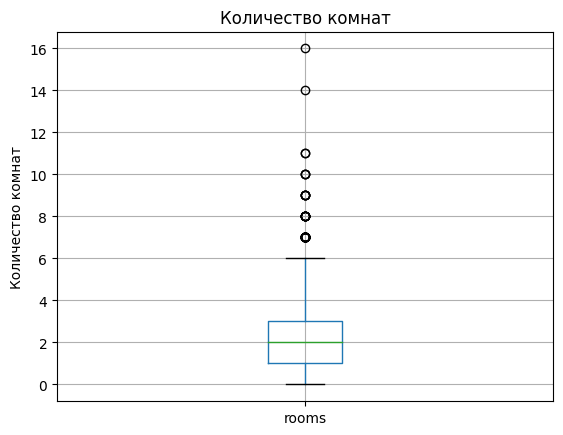

In [54]:
data.boxplot('rooms')
plt.title('Количество комнат')
plt.ylabel("Количество комнат")
plt.show()


In [55]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0, 11,  7,  8, 10,  9, 16, 14],
      dtype=int64)

In [56]:
data[(data['rooms']==16)|(data['rooms']==10)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,False,False,False,18.8,1,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5.0,161.4,2,False,False,False,19.8,0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6.0,189.4,6,False,False,False,30.0,1,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0


16 комнат на площадь 270 и 10 комнат на площадь 272,6 216,1 290,0 вполне возможно.Оставляем данные 

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23311 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23311 non-null  int64         
 1   last_price            23311 non-null  float64       
 2   total_area            23311 non-null  float64       
 3   first_day_exposition  23311 non-null  datetime64[ns]
 4   rooms                 23311 non-null  int64         
 5   ceiling_height        23311 non-null  float64       
 6   floors_total          23311 non-null  float64       
 7   living_area           23311 non-null  float64       
 8   floor                 23311 non-null  int64         
 9   is_apartment          23311 non-null  bool          
 10  studio                23311 non-null  bool          
 11  open_plan             23311 non-null  bool          
 12  kitchen_area          23311 non-null  float64       
 13  balcony              

После предобработки данных было удалено 388 недвижимостей. Это 1,7% от общих данных.

**Вывод шаг 2. Предобработка данных**
        
2.1.Заполнили пропущенные значения там, где это возможно. Если логичную замену предложить невозможно, то оставили эти значения пустыми.   
- `ceiling_height`  Все пропуски заменили медианным значением по населенному пункту.   
- `floors_total` пропуски заменили медианным значением по населенному пункту.    
- `living_area` Все пропуски заменили медианным значением по количеству комнат, убрали анамальные значения.   
- `is_apartment` заполнили все значения на False (не коммерческое помещение).   
- `kitchen_area` Заполним медианным значениями по пропускам относительно количество комнат.   
- `balcony` пропуски заполнили 0, так как могут быть квартиры без балкона.    
- `locality_name` удалили строки с пропусками, тк таких квартир всего 49 и без местоположения сложно проанализировать данные.   
       
2.2 Рассмотрели  типы данных в каждом столбце.Нашли столбцы, в которых нужно изменить тип данных.Преобразовали  тип данных в выбранных столбцах.
- `first_day_exposition` — дата публикации из типа objekt в тип даты.  
- `is_apartment` — из типа objekt в булев тип   
- `balcony` -  дробное число поменяем на целое
        
2.3 Изучили уникальные значения в столбце с названиями и устранили неявные дубликаты. 
        
2.4 Обнаружили и удалили аномальные значения:
- `ceiling_height` - проанализировав высоту потолков, было принято решение удалить высоту потолков меньше 2,4м и больше 5м     
- `floors_total`- аномальных значений нет.Обнаружили 32 недвижимостей с ошибкой в данных. Этажность здания ниже,чем этаж недвижимости. Эти данные оставили как есть.
- `living_area`- Удалили недвижимость помещения меньше 5м2 и больше 200м2 (0,15% от общих данный)
- `last_price` Явные выбросы мы убрали с помощью квантилей

После предобработки данных было удалено 388 недвижимостей. Это 1,7% от общих данных.


# **3 шаг.** <a id="three"></a>Добавление в таблицу новых столбцов

## 3.1 <a id="three1"></a>Цена одного квадратного метра

In [58]:
import numpy as np
data['skm_price'] = (data['last_price']/data['total_area']).apply(np.floor)

In [59]:
data['skm_price']

0        120370.0
1         82920.0
2         92785.0
4        100000.0
5         95065.0
           ...   
23694     72490.0
23695     52542.0
23696     44091.0
23697    149511.0
23698     41795.0
Name: skm_price, Length: 23311, dtype: float64

## 3.2. <a id="three2"></a>День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [60]:
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
4       2018-06-19
5       2018-09-10
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23311, dtype: datetime64[ns]

In [61]:
data['weekday_publication']=data['first_day_exposition'].dt.weekday

In [62]:
data['weekday_publication']

0        3
1        1
2        3
4        1
5        0
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday_publication, Length: 23311, dtype: int32

## 3.3 <a id="three3"></a>Месяц публикации объявления

In [63]:
data['month_publication']=data['first_day_exposition'].dt.month

In [64]:
data['month_publication']

0         3
1        12
2         8
4         6
5         9
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_publication, Length: 23311, dtype: int32

## 3.4 <a id="three4"></a>Год публикации объявления

In [65]:
data['year_publication']=data['first_day_exposition'].dt.year


In [66]:
data['year_publication']

0        2019
1        2018
2        2015
4        2018
5        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_publication, Length: 23311, dtype: int32

## 3.5 <a id="three5"></a>Тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [67]:
def floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor==floors_total:
        return 'последний'
    return 'другой'


In [68]:
data ['floor_type'] = data.apply (floor, axis=1)

In [69]:
data['floor_type']

0        другой
1        первый
2        другой
4        другой
5        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_type, Length: 23311, dtype: object

## 3.6 <a id="three6"></a>Расстояние до центра города в километрах (переведем из м в км и округлим до целых значений)

In [70]:
data['city_сenters_nearest_km']=(data['city_сenters_nearest']/1000).round(0)

In [71]:
data['city_сenters_nearest_km']

0        16.0
1        19.0
2        14.0
4         8.0
5         NaN
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: city_сenters_nearest_km, Length: 23311, dtype: float64

**Вывод шаг 3. Добавление в таблицу новых столбцов**   
Добавленные столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах .

    


# **4 шаг.**<a id="four"></a> Исследовательский анализ данных

## <a id="four1"></a>4.1.Изучение параметров объекта

- Общая площадь, жилая площадь, площадь кухни, комнаты 

In [72]:
data[['total_area','living_area', 'kitchen_area','rooms']].describe()

,total_area,living_area,kitchen_area,rooms
count,23311.000000,23311.000000,23311.000000,23311.000000
mean,59.127607,33.670843,10.258698,2.055253
std,30.111382,18.947747,5.230538,1.042528
min,12.000000,5.400000,0.000000,0.000000
25%,40.000000,18.400000,7.200000,1.000000
50%,52.000000,30.200000,9.010000,2.000000
75%,69.000000,42.400000,11.425000,3.000000
max,494.100000,200.000000,100.700000,16.000000


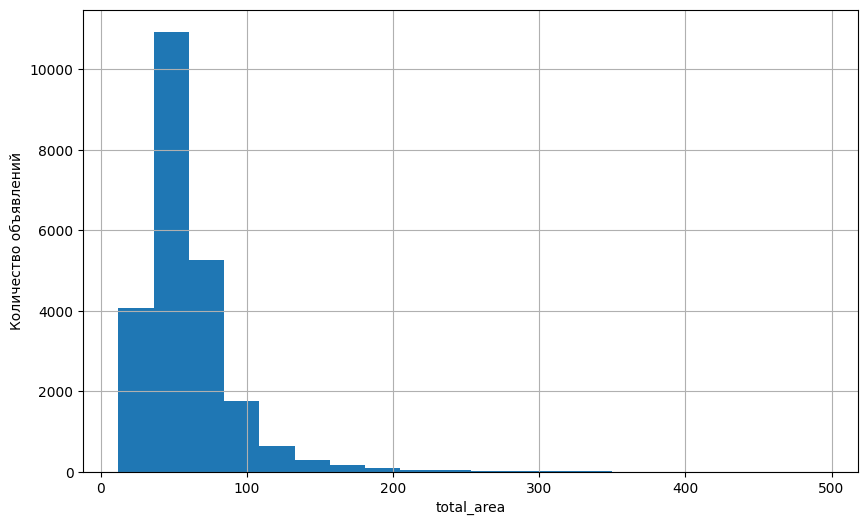

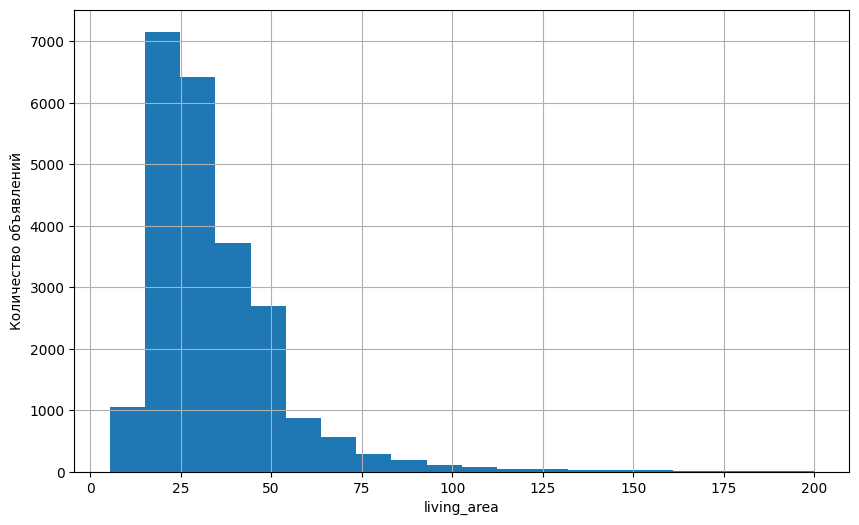

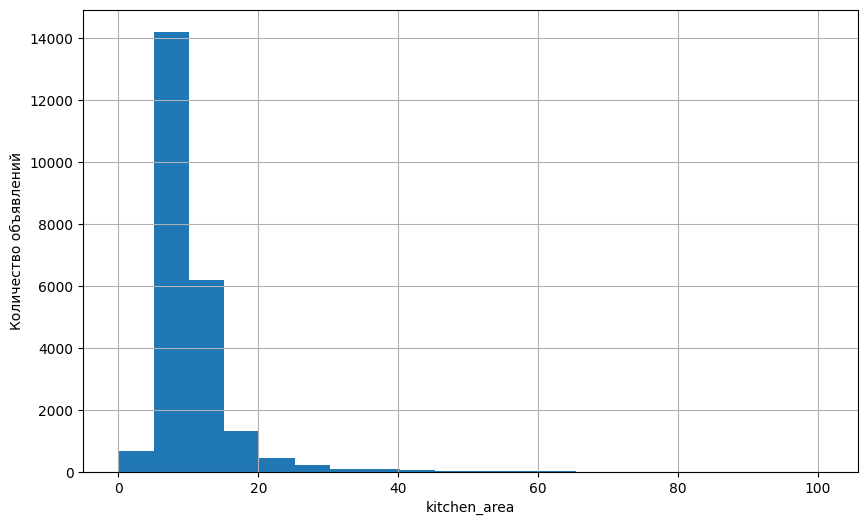

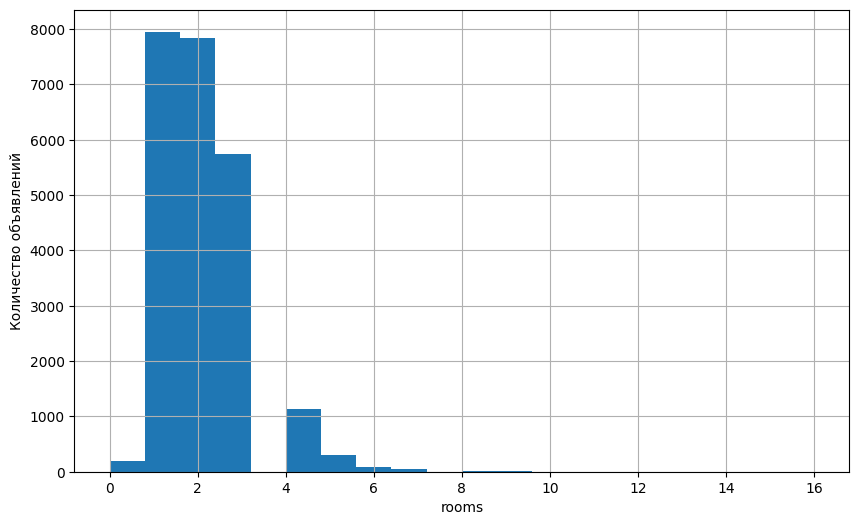

In [73]:
column_list_1 = ['total_area','living_area','kitchen_area','rooms']

for column in column_list_1:
    data[column].hist(bins=20,figsize=(10,6))
    plt.xlabel(column)
    plt.ylabel('Количество объявлений')
    plt.show()

Text(0.5, 0.98, 'Объединенная гистограмма')

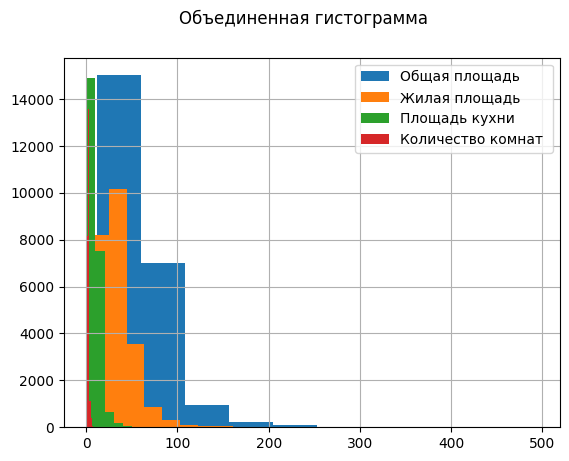

In [74]:
data['total_area'].hist( bins=10, label='Общая площадь')
data['living_area'].hist( bins=10, label='Жилая площадь')
data['kitchen_area'].hist(bins=10, label='Площадь кухни')
data['rooms'].hist(bins=10, label='Количество комнат ')
plt.legend()
plt.suptitle("Объединенная гистограмма")

1. Максимальная площадь:  
Всего-494 м2, жилая площадь 200м2, кухня -100,7 м2, комнат-16
2. Минимальная площадь:   
Всего- 12м2, жилая площадь-5.4 м2, кухня 0 и комнат(студия)
3. Средняя площадь:   
Всего-52 м2, жилая площадь- 30,2м2, кухня-9м2, комнат -2 
4. Гистограммы идентичны    
Все показатели показывают, что объёмы пропорциональны. Среднее значение это стандартная 2-комнатная квартира.


- Высота потолков, этаж квартиры, общее количество этажей в доме

In [75]:
data[['ceiling_height','floor','floors_total']].describe()

,ceiling_height,floor,floors_total
count,23311.00000,23311.000000,23311.000000
mean,2.69987,5.915834,10.734267
std,0.21310,4.896119,6.588812
min,2.40000,1.000000,1.000000
25%,2.55000,2.000000,5.000000
50%,2.70000,4.000000,9.000000
75%,2.70000,8.000000,16.000000
max,4.80000,33.000000,60.000000


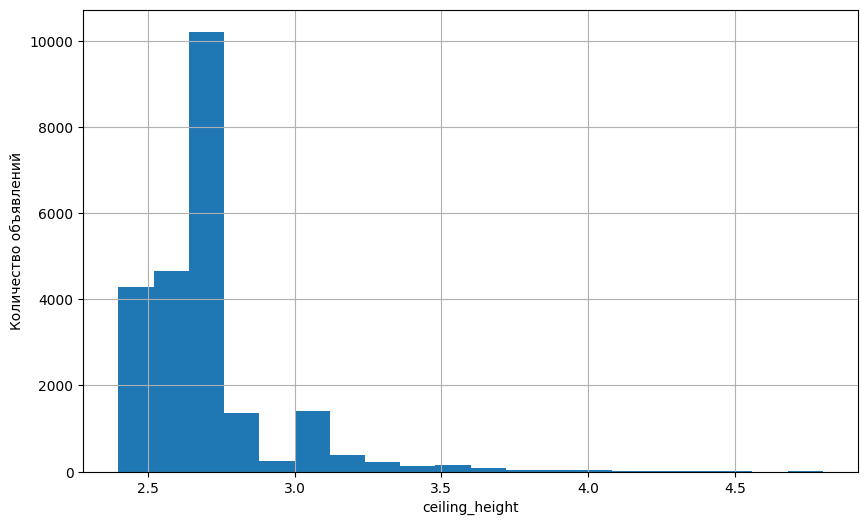

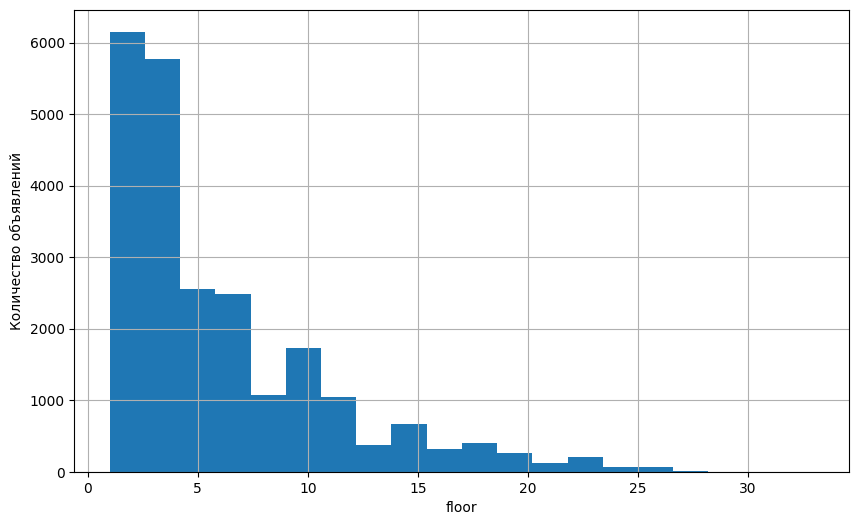

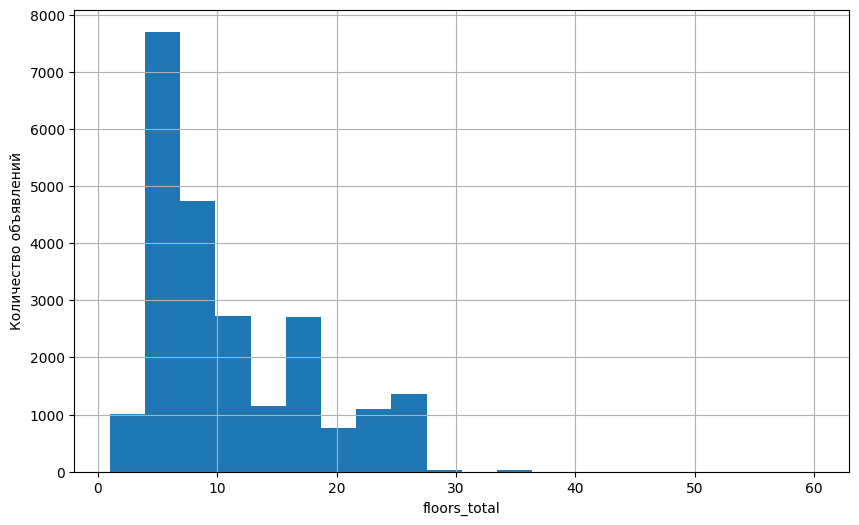

In [76]:
column_list_2 = ['ceiling_height','floor','floors_total']

for column in column_list_2:
    data[column].hist(bins=20,figsize=(10,6))
    plt.xlabel(column)
    plt.ylabel('Количество объявлений')
    plt.show()

1. Минимальная высота 2,4 , Максимальная 4,8 м (за счет устранения аномальных значений) , средняя 2,7м. 
2. Максимальное количество этажей в доме 60, минимальное 1, среднее значение 9 этажей
3. Максимальное этажей 33, минимальное 1, среднее значение 4 этажей
4. Чаще всего недвижимость на 5-6 этаже.
5. По гистограмме видно, что больше всего предложений со стандартной высотой потолка, этажность 1-10 и так же большинство зданий до 10 этажей.



- Тип этажа квартиры

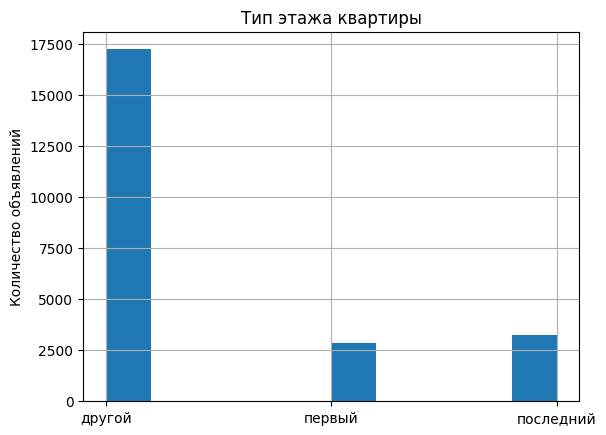

In [77]:
data['floor_type'].hist()
plt.title('Тип этажа квартиры')
plt.ylabel("Количество объявлений")
plt.show()

Примерно 14 % предложений на последнем этаже и 14% предложений на первом этаже. Все остальные промежуточные 

- Расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка

In [78]:
data[['city_сenters_nearest','airports_nearest','parks_nearest']].describe()

,city_сenters_nearest,airports_nearest,parks_nearest
count,17955.000000,17934.000000,7929.000000
mean,14278.247842,28821.579625,492.324505
std,8594.606497,12681.609399,342.983240
min,181.000000,0.000000,1.000000
25%,9425.000000,18516.000000,288.000000
50%,13149.000000,26773.000000,456.000000
75%,16333.000000,37406.000000,613.000000
max,65968.000000,84869.000000,3190.000000


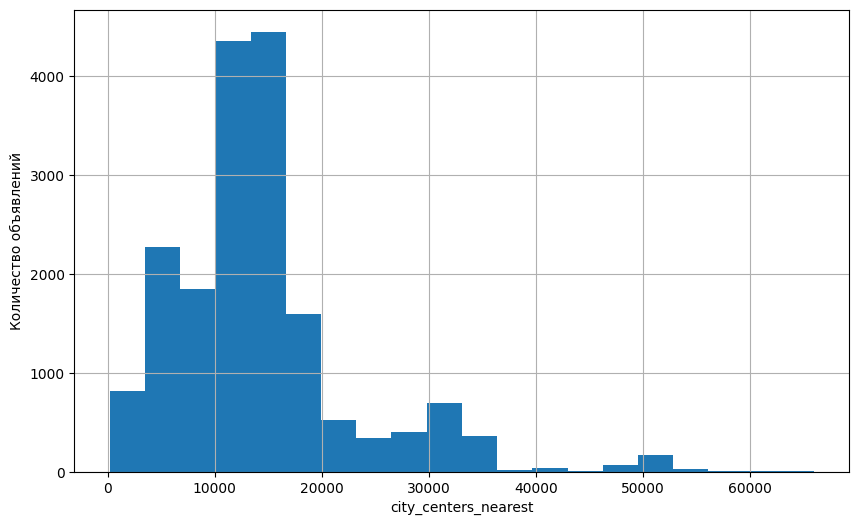

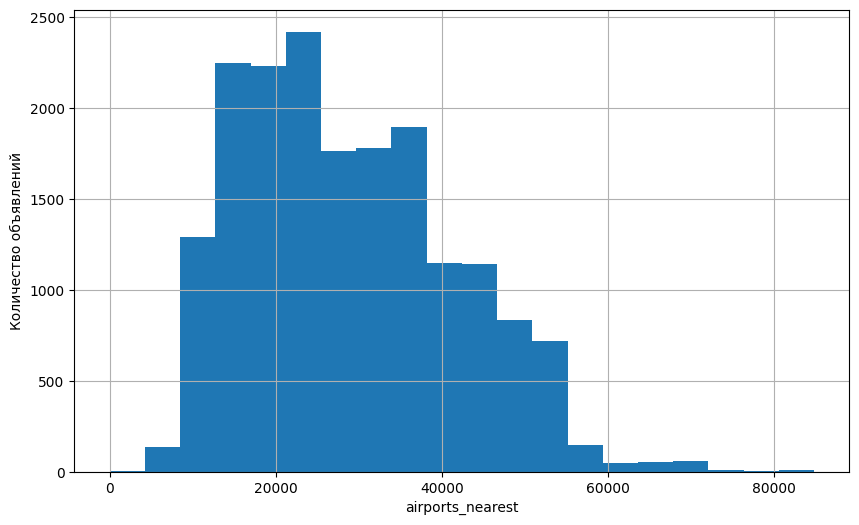

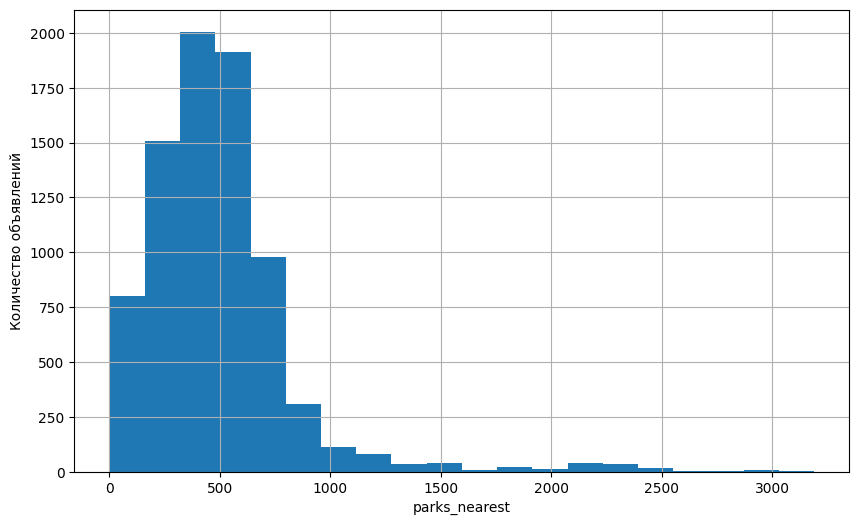

In [79]:
column_list_3 = ['city_сenters_nearest','airports_nearest','parks_nearest']

for column in column_list_3:
    data[column].hist(bins=20,figsize=(10,6))
    plt.xlabel(column)
    plt.ylabel('Количество объявлений')
    plt.show()

1. Меньше всего проблем с парками, большинство недвижимости находится до полу километра. Это подтверждает и среднее значение и гистограмма 
2. Аэропорты часто находятся до 84 км (примерно час езды, если ехать из Питера). Среднее значение 26 км.
3. Большинство недвижимости находится в 13 км от центра города по среднему значению и 10-17 км по гистограмме. 


- День и месяц публикации объявления

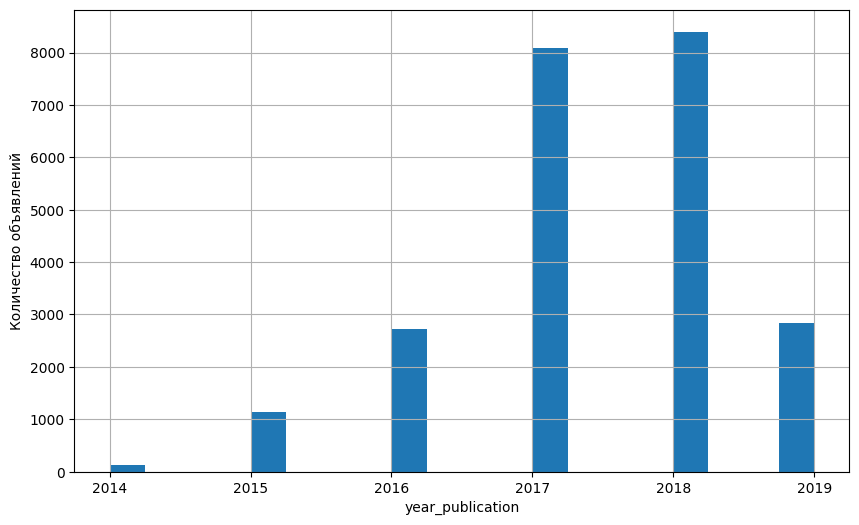

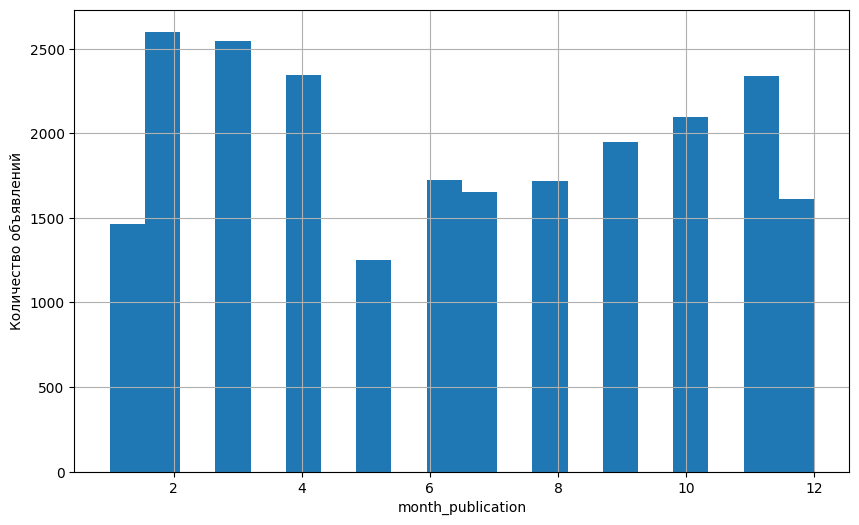

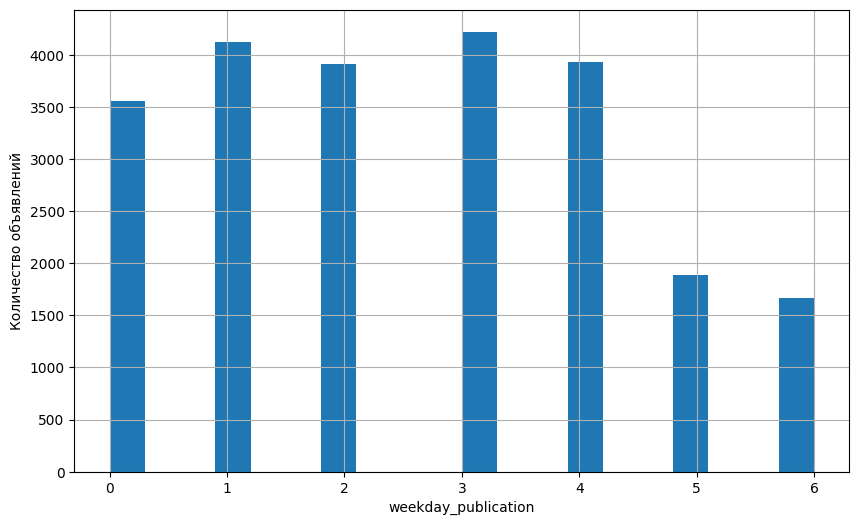

In [80]:
column_list_4 = ['year_publication','month_publication','weekday_publication']

for column in column_list_4:
    data[column].hist(bins=20,figsize=(10,6))
    plt.xlabel(column)
    plt.ylabel('Количество объявлений')
    plt.show()

   - В 2018 году максимальное количество выставленых обьявлений.
   - Зимой выставляют недвижимость чаще, чем летом. 
   - В выходные реже, чем в будние дни

- Цена объекта

In [81]:
data['last_price']=data['last_price']/1000000 #перевели в миллионы 

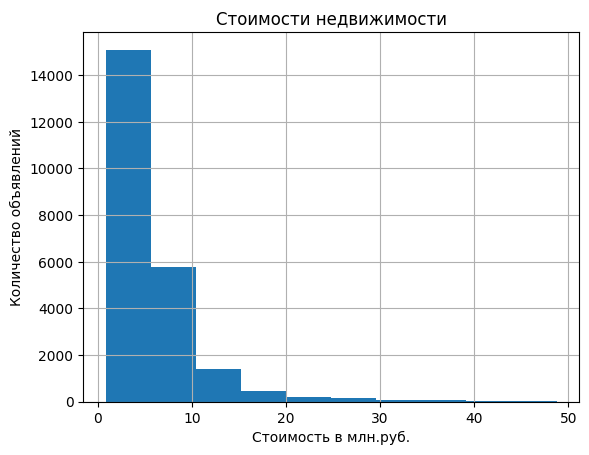

In [82]:
data['last_price'].hist(bins=10)
plt.title('Стоимости недвижимости')
plt.xlabel("Стоимость в млн.руб.")
plt.ylabel("Количество объявлений")
plt.show()

In [83]:
data[['last_price']].describe()

,last_price
count,23311.000000
mean,5.994549
std,4.834425
min,0.820000
25%,3.450000
50%,4.650000
75%,6.700000
max,48.763000


Среднее значение 4,65 млн. Гистограмма это подтверждает. Минимальная цена 820 тыс, это может быть мало популярное жилье в деревне. Максимальное 48,76 млн, а это точно в Питере 

## <a id="four2"></a> 4.2 Изучим, как быстро продавались квартиры

In [84]:
data[['days_exposition']].describe()


,days_exposition
count,20195.000000
mean,180.172964
std,219.480358
min,1.000000
25%,45.000000
50%,95.000000
75%,230.000000
max,1580.000000


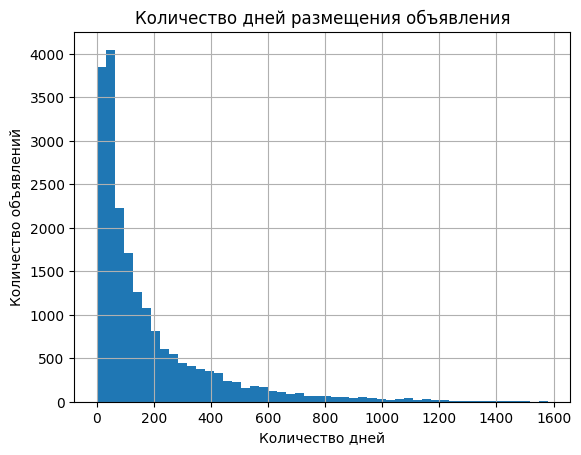

In [85]:
data['days_exposition'].hist(bins=50)
plt.title('Количество дней размещения объявления')
plt.xlabel("Количество дней")
plt.ylabel("Количество объявлений")
plt.show()

In [86]:
print('Медианное значение количества дней размещения обьявления:', data['days_exposition'].median())

Медианное значение количества дней размещения обьявления: 95.0


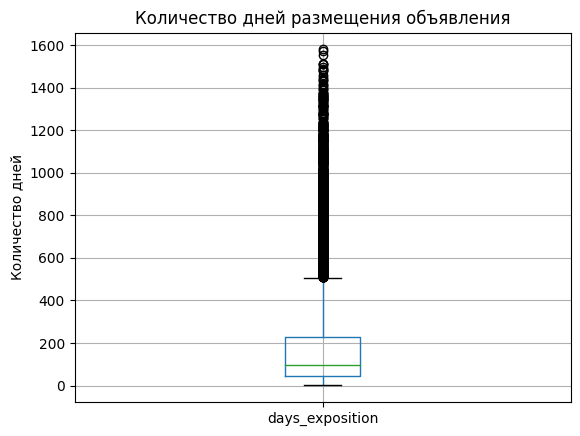

In [87]:
data.boxplot('days_exposition')
plt.title('Количество дней размещения объявления')
plt.ylabel("Количество дней")
plt.show()

1580/360=4.3 года максимальное дней продажи. Скорее всего объявление просто не закрыли. Или жилье находится в малоперспективной деревне, где продать жилье целая проблема

Минимальное значение 1 день. Это обозначает либо клиент передумал продавать, либо его перехватили риелторы и после будут от компании выставлять объявления. Либо клиент правда продал за один день, что кажется удивительно.

Среднее значение 191/30=6 месяцев
Медианное значение 106/30=3 месяца

По гистограмме в первые 2 месяца быстрее всего продаются квартиры. Посмотрим детальнее самые продаваемые месяца 1-6 месяцев.


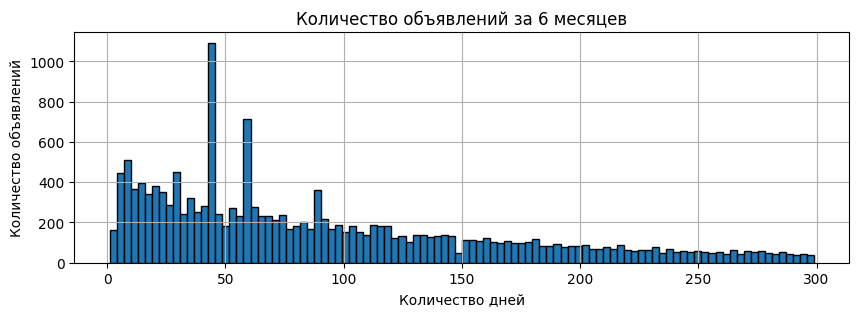

In [88]:
data.query('days_exposition<300')['days_exposition'].hist(bins=100, figsize=(10,3), ec='black')
plt.title('Количество объявлений за 6 месяцев')
plt.xlabel("Количество дней")
plt.ylabel("Количество объявлений")
plt.show()

Есть примерно 4 пика, посмотрим их поближе.

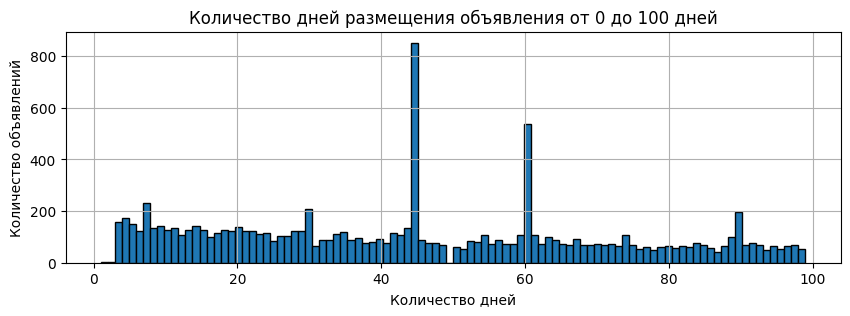

In [89]:
data.query('0<days_exposition<100')['days_exposition'].hist(bins=100, figsize=(10,3), ec='black')
plt.title('Количество дней размещения объявления от 0 до 100 дней')
plt.xlabel("Количество дней")
plt.ylabel("Количество объявлений")
plt.show()

Пики находятся на 7 дне-примерно больше 200 единиц, 30 день -200 единиц, 45 день- больше 800 единиц, 60 день-больше 500 единиц, 90день-примерно 200 единиц. Все остальные меньше 200.

Числа выглядят "очень красивыми"- 7 дней это неделя, 30 дней это как месяц, 45 дней-полтора месяца, 60 дней это два месяца, 90 это 3 месяца. Такие выбросы могут быть связаны с приложением, где выставляют недвижимость. Может приложение снимает с публикации.

На сайте https://yandex.ru/support/realty/owner/home/add-ads-housing.html мы можем увидеть информацию про срокам публикации, именно на 7,30,45,60,90 часто срок бесплатной публикации заканчивается 


Вывод: Выставление бесплатно квартиры до 4,5 млн срок 45 дней, до 10 млн-60дней, больше 10-90 дней.Все квартиры проданные в промежутке от 0 до 45 дней можно считать быстро проданными. Дальше либо квартира не продалась и ее продлили платно, либо квартира больше 4,5 млн. Больше 90 дней уже можно точно считать долгими продажами 

## <a id="four3"></a> 4.3 Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта.

- Зависит ли цена от общей площади

In [90]:
def categorize_income(income):
    try:
        if 0 <= income <= 1:
            return '0-1 млн'
        elif 1 < income <= 3:
            return '1-3 млн'
        elif 3 < income <= 6:
            return '3-6 млн'
        elif 6 < income <= 9:
            return '6-9 млн'
        elif income > 9:
            return '9 млн и больше'
    except:
        pass

In [91]:
data['last_price_category'] = data['last_price'].apply(categorize_income)


In [92]:
def categorize_income1(income1):
    try:
        if 0 <= income1 <= 20:
            return '0-20 м2'
        elif 20 < income1 <= 40:
            return '21-40 м2'
        elif 40 < income1 <= 60:
            return '41-60 м2'
        elif 60 < income1 <= 90:
            return '61-90 м2'
        elif income1 > 91:
            return '91 м2 и больше'
    except:
        pass

In [93]:
data['total_area_category'] = data['total_area'].apply(categorize_income1)

In [94]:
data_pivot = data.pivot_table(index=['total_area_category'], columns='last_price_category', values='rooms', aggfunc='count')
data_pivot


last_price_category,0-1 млн,1-3 млн,3-6 млн,6-9 млн,9 млн и больше
total_area_category,,,,,
0-20 м2,1.0,30.0,3.0,NaN,NaN
21-40 м2,55.0,2090.0,3700.0,69.0,6.0
41-60 м2,49.0,1467.0,6259.0,1146.0,80.0
61-90 м2,16.0,294.0,2096.0,2373.0,1103.0
91 м2 и больше,NaN,8.0,88.0,362.0,1936.0


In [95]:
data[['total_area', 'last_price']].corr()

,total_area,last_price
total_area,1.00000,0.78446
last_price,0.78446,1.00000


Чем больше квартира по площади, тем стоимость выше.
Самые высокие показатели: 
- 0-20м2 - 1-3 млн
- 21-40м2 - 3-6 млн
- 41-60м2 - 3-6 млн
- 61-90м2 - 6-9 млн
- 91 и больше м2 - 9 млн и больше 

По корреляции видно что зависимость между ценой и общей площадью высока.У нас значение 0,785 а по картинке ниже видно, что это обозначает , что зависимость есть

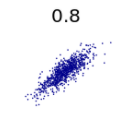

- Зависит ли цена от жилой площади

In [96]:
def categorize_income2(income3):
    try:
        if 0 <= income3 <= 20:
            return '0-20 м2'
        elif 20 < income3 <= 40:
            return '21-40 м2'
        elif 40 < income3 <= 60:
            return '41-60 м2'
        elif 60 < income3 <= 90:
            return '61-90 м2'
        elif income3 > 91:
            return '91 м2 и больше'
    except:
        pass

In [97]:
data['living_area_category'] = data['living_area'].apply(categorize_income2)

In [98]:
data_pivot = data.pivot_table(index=['living_area_category'], columns='last_price_category', values='rooms', aggfunc='count')
data_pivot

last_price_category,0-1 млн,1-3 млн,3-6 млн,6-9 млн,9 млн и больше
living_area_category,,,,,
0-20 м2,50.0,2205.0,4645.0,336.0,54.0
21-40 м2,55.0,1335.0,5669.0,1715.0,617.0
41-60 м2,16.0,334.0,1770.0,1667.0,1233.0
61-90 м2,NaN,14.0,64.0,249.0,861.0
91 м2 и больше,NaN,NaN,7.0,10.0,398.0


In [99]:
data[['living_area', 'last_price']].corr()

,living_area,last_price
living_area,1.000000,0.662394
last_price,0.662394,1.000000


Чем больше жилая площадь квартиры, тем стоимость выше. Самые высокие показатели:

- 0-20м2 - 3-6 млн
- 21-40м2 - 3-6 млн
- 41-60м2 - 3-6 млн
- 61-90м2 - 9 млн и больше
- 91 и больше м2 - 9 млн и больше


Корреляция хуже чем с общей площадью-0,66, есть небольшая привязаность 

- Зависит ли цена от площади кухни

In [100]:
def categorize_income4(income4):
    try:
        if 0 <= income4 <= 5:
            return '0-05 м2'
        elif 5 < income4 <= 10:
            return '05-10 м2'
        elif 10 < income4 <= 15:
            return '10-15 м2'
        elif 15 < income4 <= 20:
            return '15-20 м2'
        elif income4 > 20:
            return '20 м2 и больше'
    except:
        pass

In [101]:
data['kitchen_area_category'] = data['kitchen_area'].apply(categorize_income4)

In [102]:
data_pivot = data.pivot_table(index=['kitchen_area_category'], columns='last_price_category', values='rooms', aggfunc='count')
data_pivot

last_price_category,0-1 млн,1-3 млн,3-6 млн,6-9 млн,9 млн и больше
kitchen_area_category,,,,,
0-05 м2,14.0,318.0,296.0,16.0,6.0
05-10 м2,105.0,3219.0,8552.0,1772.0,558.0
10-15 м2,1.0,329.0,2904.0,1705.0,1204.0
15-20 м2,1.0,16.0,313.0,325.0,733.0
20 м2 и больше,NaN,7.0,90.0,160.0,667.0


In [103]:
data[['kitchen_area', 'last_price']].corr()

,kitchen_area,last_price
kitchen_area,1.000000,0.577872
last_price,0.577872,1.000000


Чем больше площадь кухни квартиры, тем стоимость выше. Самые высокие показатели:

- 0-5 м2 - 1-6млн
- 5-10 м2- 3-6млн
- 10-15 м2 - 3-6 млн
- 15-20 м2 - 9 млн и больше
- 20 м2 и больше - 9 млн и больше

Корреляция есть, но меньше чем у общей площади и жилой площади

- Зависит ли цена от количества комнат


In [104]:
data_pivot = data.pivot_table(index=['rooms'], columns='last_price_category', values='kitchen_area', aggfunc='count')
data_pivot

last_price_category,0-1 млн,1-3 млн,3-6 млн,6-9 млн,9 млн и больше
rooms,,,,,
0,1.0,114.0,73.0,3.0,1.0
1,47.0,2205.0,5154.0,456.0,90.0
2,46.0,1116.0,4323.0,1598.0,759.0
3,26.0,402.0,2348.0,1569.0,1396.0
4,1.0,46.0,235.0,310.0,544.0
5,NaN,6.0,21.0,37.0,232.0
6,NaN,NaN,1.0,4.0,84.0
7,NaN,NaN,NaN,1.0,41.0
8,NaN,NaN,NaN,NaN,9.0


In [105]:
data[['rooms', 'last_price']].corr()

,rooms,last_price
rooms,1.000000,0.506573
last_price,0.506573,1.000000


Чем больше комнат, тем стоимость выше. Самые высокие показатели:
- студии (они могут быть в Питере, поэтому стоимость до 3 млн это нормально)- 1-3 млн
- 1-3 комнат- 3-6 млн
- 4-16 комнат - 9 млн и больше

Корреляция средняя 


- Зависит ли цена от типа этажа, на котором расположена квартира (первый, последний, другой)



In [106]:
data_pivot = data.pivot_table(index=['floor_type'], columns='last_price_category', values='kitchen_area', aggfunc='count')
data_pivot['total'] = data_pivot['0-1 млн']+data_pivot['1-3 млн']+data_pivot['3-6 млн']+data_pivot['6-9 млн']+data_pivot['9 млн и больше']
data_pivot

last_price_category,0-1 млн,1-3 млн,3-6 млн,6-9 млн,9 млн и больше,total
floor_type,,,,,,
другой,50,2328,9167,3154,2520,17219
первый,41,791,1494,347,181,2854
последний,30,770,1494,477,467,3238


Посмотрим самые дорогие квартиры
- 16% в других этажах стоит 9 млн и больше 
- 6.7% на первом этаже стоит 9 млн и больше
- 16% на последнем этаже стоит 9 млн и больше

Можно сделать вывод, что квартиры на первом этаже стоят дешевле,чем на остальных этажах, или квартиры с большой площадью редко встречаются на первом этаже

- Зависит ли цена от даты размещения (день недели, месяц, год);


In [107]:
data_pivot = data.pivot_table(index=['weekday_publication'], columns='last_price_category', values='kitchen_area', aggfunc='count')
data_pivot

last_price_category,0-1 млн,1-3 млн,3-6 млн,6-9 млн,9 млн и больше
weekday_publication,,,,,
0,15,569,1906,589,480
1,14,695,2149,688,578
2,22,639,2009,694,550
3,25,719,2130,712,639
4,20,647,2084,699,484
5,15,347,963,335,229
6,10,273,914,261,208


Можно визуально заметить:
- в выходные обьявления выставляют намного меньше
- самые популярные дни вторник и четверг
- день недели не влияет на стоимость квартиры 

In [108]:
data_pivot = data.pivot_table(index=['month_publication'], columns='last_price_category', values='kitchen_area', aggfunc='count')
data_pivot

last_price_category,0-1 млн,1-3 млн,3-6 млн,6-9 млн,9 млн и больше
month_publication,,,,,
1,8,256,745,248,207
2,16,452,1333,444,357
3,17,431,1337,429,334
4,12,348,1233,442,308
5,9,200,662,212,169
6,10,316,897,293,210
7,5,282,862,279,228
8,7,287,899,295,233
9,11,310,1016,308,305


Можно визуально заметить:

- летом обьявления выставляют намного меньше
- самые популярные месяцы февраль, март, май, сентябрь
- месяц не влияет на стоимость квартиры



In [109]:
data_pivot = data.pivot_table(index=[ 'year_publication'], columns='last_price_category', values='kitchen_area', aggfunc='count')
data_pivot

last_price_category,0-1 млн,1-3 млн,3-6 млн,6-9 млн,9 млн и больше
year_publication,,,,,
2014,NaN,11.0,41.0,25.0,56.0
2015,3.0,138.0,556.0,212.0,237.0
2016,11.0,461.0,1411.0,443.0,393.0
2017,33.0,1432.0,4253.0,1294.0,1066.0
2018,58.0,1468.0,4445.0,1408.0,1021.0
2019,16.0,379.0,1449.0,596.0,395.0


Можно визуально заметить:

- 2019 год может быть не полный поэтому резкий спад
- год не влияет на стоимость квартиры



## <a id="four4"></a> 4.4 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [110]:

top10 = data['locality_name'].value_counts().index.tolist()[:10]
mean10_metrics=[]
for city in top10:
    mean10_metrics.append(data[data['locality_name'] == city]['skm_price'].median())
frame = {'Город': top10, 'Средняя цена за кв.м., руб.': mean10_metrics}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., руб.', ascending=False)
dataframe

,Город,"Средняя цена за кв.м., руб."
0,Санкт-Петербург,104534.0
4,Пушкин,99993.5
8,деревня Кудрово,91860.0
6,посёлок Парголово,91642.0
1,посёлок Мурино,85714.0
2,посёлок Шушары,76876.0
5,Колпино,74723.5
7,Гатчина,67860.0
3,Всеволожск,65789.0
9,Выборг,58407.0


- Самый дорогой город Санкт Петербург, средняя цена 1м2-105 тыс.руб 
- Доступное жилье Выборг - 58 ,4тыс.руб

## <a id="four5"></a> 4.5. Определим как стоимость объектов зависит от расстояния до центра города.

Text(0, 0.5, 'Стоимость')

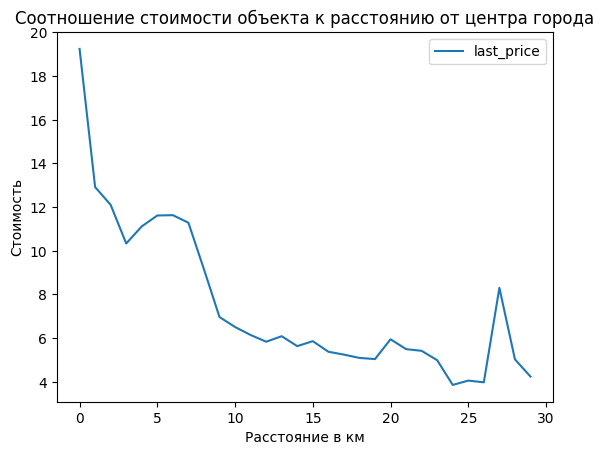

In [111]:
sp = data[data['locality_name'] == 'Санкт-Петербург']
sp = sp.pivot_table(index='city_сenters_nearest_km', values='last_price')

sp.plot()

pl.title('Соотношение стоимости объекта к расстоянию от центра города')
pl.xlabel("Расстояние в км")
pl.ylabel("Стоимость")


In [112]:
data[(data['locality_name'] == 'Санкт-Петербург') & (data['city_сenters_nearest_km'] >25) & (data['last_price'] >8)][['city_сenters_nearest_km','last_price', 'total_area']].head(50)

,city_сenters_nearest_km,last_price,total_area
748,27.0,14.35,74.0


На графике видно, чем дальше от центра, тем стоимость квартир ниже. Кроме одной квартиры, которая показывает "всплеске" в 27 км от центра города. Стоимость этой квартиры за 74 м2-14,35 млн. После 10 км цена начинает падать плавнее, скорее всего это и есть граница центра города 

# **5 шаг.** <a id="five"></a> Общий вывод

**Шаг 1 Открыть файл с данными и изучить общую информацию**

1. Таблица состоит из столбцов:
    - `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
    - `balcony` — число балконов
    - `ceiling_height` — высота потолков (м)
    - `cityCenters_nearest` — расстояние до центра города (м)
    - `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
    - `first_day_exposition` — дата публикации
    - `floor` — этаж
    - `floors_total` — всего этажей в доме
    - `is_apartment` — апартаменты (булев тип)
    - `kitchen_area` — площадь кухни в квадратных метрах (м²)
    - `last_price` — цена на момент снятия с публикации
    - `living_area` — жилая площадь в квадратных метрах (м²)
    - `locality_name` — название населённого пункта
    - `open_plan` — свободная планировка (булев тип)
    - `parks_around3000` — число парков в радиусе 3 км
    - `parks_nearest` — расстояние до ближайшего парка (м)
    - `ponds_around3000` — число водоёмов в радиусе 3 км
    - `ponds_nearest` — расстояние до ближайшего водоёма (м)
    - `rooms` — число комнат
    - `studio` — квартира-студия (булев тип)
    - `total_area` — общая площадь квартиры в квадратных метрах (м²)
    - `total_images` — число фотографий квартиры в объявлении               

2. Проанализировав все названия столбцов, для будующего удобства было решено переименовать cityCenters_nearest в city_сenters_nearest  

3. Всего 23 699 недвижимости в датасете.

**Шаг 2. Предобработка данных**
        
2.1.Заполнили пропущенные значения там, где это возможно. Если логичную замену предложить невозможно, то оставили эти значения пустыми.   
- `ceiling_height`  Все пропуски заменили медианным значением по населенному пункту.   
- `floors_total` пропуски заменили медианным значением по населенному пункту.    
- `living_area` Все пропуски заменили медианным значением по количеству комнат, убрали анамальные значения.   
- `is_apartment` заполнили все значения на False (не коммерческое помещение).   
- `kitchen_area` Заполним медианным значениями по пропускам относительно количество комнат.   
- `balcony` пропуски заполнили 0, так как могут быть квартиры без балкона.    
- `locality_name` удалили строки с пропусками, тк таких квартир всего 49 и без местоположения сложно проанализировать данные.   
       
2.2 Рассмотрели  типы данных в каждом столбце. Нашли столбцы, в которых нужно изменить тип данных. Преобразовали  тип данных в выбранных столбцах.
- `first_day_exposition` — дата публикации из типа objekt в тип даты.  
- `is_apartment` — из типа objekt в булев тип   
- `balcony` -  дробное число поменяем на целое
        
2.3 Изучили уникальные значения в столбце с названиями и устранили неявные дубликаты. 
        
2.4 Обнаружили и удалили аномальные значения:
- `ceiling_height` - проанализировав высоту потолков, было принято решение удалить высоту потолков меньше 2,4м и больше 5м     
- `floors_total`- аномальных значений нет. Обнаружили 32 недвижимостей с ошибкой в данных. Этажность здания ниже, чем этаж недвижимости. Эти данные оставили как есть.
- `living_area`- Удалили недвижимость помещения меньше 5м2 и больше 200м2 (0,15% от общих данный)
- `last_price` Явные выбросы мы убрали с помощью квантилей

После предобработки данных было удалено 388 недвижимостей. Это 1,7% от общих данных.

**Шаг 3. Добавление в таблицу новых столбцов**   
Добавленные столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах .

**Шаг 4. Добавление в таблицу новых столбцов**   
4.1 Изучили следующие параметры объектов:

- Площадь помещений:   
1. Максимальная площадь:  
Всего-494 м2, жилая площадь 200м2, кухня -100,7 м2, комнат-16
2. Минимальная площадь:   
Всего- 12м2, жилая площадь-5.4 м2, кухня 0 и комнат(студия)
3. Средняя площадь:   
Всего-52 м2, жилая площадь- 30,2м2, кухня-9м2, комнат -2 
4. Гистограммы идентичны    
Все показатели показывают, что объёмы пропорциональны. Средние значение это стандартная 2-комнатаня квартира.

- Высота потолков, этаж квартиры, общее количество этажей в доме
1. Минимальная высота 2,4 , Максимальная 4,8 м (за счет устранения аномальных значений) , средняя 2,7м. 
2. Максимальное количество этажей в доме 60, минимальное 1, среднее значение 9 этажей
3. Максимальное этажей 33, минимальное 1, среднее значение 4 этажей
4. Чаще всего недвижимость на 5-6 этаже.
5. По гистограмме видно, что больше всего предложений со стандартной высотой потолка, этажность 1-10 и так же большинство зданий до 10 этажей.
 
- Тип этажа квартиры:    

Примерно 14 % предложений на последнем этаже и 14% предложений на первом этаже. Все остальные промежуточные.

- Расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка    
1. Меньше всего проблем с парками, большинство недвижимости находится до полу километра
2. Аэропорты часто находятся до 50 км (примерно час езды, если ехать из Питера).Среднее значение 30 км 
3. Большинство недвижимости находится в 12-19 км от центра города. 

- День и месяц публикации объявления    

В 2018 году максимальное количество выставленных объявлений. Зимой выставляют недвижимость чаще чем летом. В выходные реже, чем в будние дни

- Цена объекта   

Среднее значение 4,65 млн. Гистограмма это подтверждает. Минимальная цена 820 тыс, это может быть мало популярное жилье в деревне. Максимальное 48,76 млн, а это точно в Питере 

        
4.2.Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

Квартиру можно выставить на продажу  до 4,5 млн срок 45 дней, до 10 млн-60дней, больше 10-90 дней. Все квартиры проданные в промежутке от 0 до 45 дней можно считать быстро проданными. Дальше либо квартира не продалась и продлили платно, либо квартира больше 4,5 млн. Больше 90 дней уже можно точно считать долгие продажи. В итоге 0-90 дней это быстрые продажи, дальше это долгие продажи
    
     
4.3.Изучим, зависит ли цена от:
- Общей площади
Чем больше квартира по площади, тем стоимость выше. Самые высокие показатели:
1. 0-20м2 - 1-3 млн
2. 21-40м2 - 3-6 млн
3. 41-60м2 - 3-6 млн
4. 1-90м2 - 6-9 млн
5. 91 и больше м2 - 9 млн и больше
Зависимость цена- общая площадь   0,785084 (1-самая сильная, 0-зависимости нет)

- Жилой площади;
Чем больше жилая площадь квартиры, тем стоимость выше. Самые высокие показатели:
1. 0-20м2 - 3-6 млн
2. 21-40м2 - 3-6 млн
3. 41-60м2 - 3-9 млн
4. 61-90м2 - 9 млн и больше
5. 91 и больше м2 - 9 млн и больше
Зависимость цена- площадь жилой   0,663366 (1-самая сильная, 0-зависимости нет)

- Площади кухни;
Чем больше площадь кухни квартиры, тем стоимость выше. Самые высокие показатели:
1. 0-5 м2 - 1-6млн
2. 5-10 м2- 3-6млн
3. 10-15 м2 - 3-6 млн
4. 15-20 м2 - 9 млн и больше
5. 20 м2 и больше - 9 млн и больше
5. 91 и больше м2 - 9 млн и больше
Зависимость цена- площадь кухни  0,5771334 (1-самая сильная, 0-зависимости нет)

- Количества комнат;
Чем больше комнат, тем стоимость выше. Самые высокие показатели:
1. студии (они могут быть в Питере, поэтому стоимость до 6 млн это нормально)- 1-6 млн
2. 1-3 комнат- 3-6 млн
3. 4-16 комнат - 9 млн и больше 
Зависимость цена- площадь кухни  0,507 (1-самая сильная, 0-зависимости нет)

- Этажа, на котором расположена квартира (первый, последний, другой);
1. 16% от всех "другие" этажах стоит 9 млн и больше
2. 6.7% от всех на первом этаже стоит 9 млн и больше
3. 16% от всех на последнем этаже стоит 9 млн и больше

Можно сделать вывод, что квартиры на первом этаже стоят дешевле,чем на остальных этажах, или квартиры с большой площадью редко встречаются на первом этаже
    
- Даты размещения (день недели, месяц, год).
1. в выходные обьявления выставляют намного меньше
2. самые популярные дни вторник и четверг
3. день недели не влияет на стоимость квартиры
4. летом обьявления выставляют намного меньше
5. самые популярные месяцы февраль, март, май, сентябрь
6. месяц не влияет на стоимость квартиры
7. 2019 год может быть не полный поэтому резкий спад
8. год не влияет на стоимость квартиры

4.4.Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделили населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

- Самый дорогой город Санкт Петербург, средняя цена 1м2-105 тыс.руб 
- Доступное жилье Выборг - 58 ,4тыс.руб
    
4.5 Выделили квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. 

Чем дальше от центра, тем стоимость квартир ниже
